### Boxplots of daily total pieces/meter per region

__Purpose:__ Making static box plots for download

__Reference:__ Getting-data

#### Variables to assign:

1) "project_name", in block one. This is the destination folder for the charts.

2) "water_body", this is the lake or river you want a chart for 

3) "file_name", this is a despcriptive. The value of waterbody will be prepended to the this and the file extension will be appended. It should state clearly the data you are capturing.

4) "start_date" and "end_date", this the date range you want for the analysis 

5) "min_date" and "max date", this appears in the figure title. Use common three letter abbreviations.

Saving your workbook remotely: Make a branch and submit a pull request for that branch.

Getting help: Ther are a few utility modules that were created to pass variables to matplotlib classes. To see the list availble methods use dir(utilities.utility_functions), for the default values on the specific method use help(name of the method).


In [1]:
import numpy as np
import json
import csv
import datetime
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import utilities.style_title_suptitle
import utilities.utility_functions 
from utilities.utility_functions import *
from utilities.scatterChart import scatterPlot
from utilities.style_title_suptitle import *
from utilities.boxplot_utilities import make_box_plot_stats
from utilities.boxplot_utilities import single_boxplot

In [2]:
# index slicing will be used 
idx = pd.IndexSlice

# store the curent working directory
here = os.getcwd()

# name the folders where the output will be sored:
folders = ["data", "charts", "utilities"]

# check for existing and if not make folders
check_for_folders(folders, here)

# make a dictionary to call path by directory name
my_folders = make_folders(folders, here)

# make a project folder to store charts
project_name = "boxplot_2017_2018/"
project_directory = make_project_folder(my_folders['charts'], project_name)

print(project_directory)

Directory already in place
/home/mwshovel/dev/analyst/probability/charts/boxplot_2017_2018/


In [3]:
# Read the JSON data in from local

# location of the data:
mlw_codes = json_file_get('/home/mwshovel/dev/analyst/probability/data/mlw_codes.json')
beach_data = json_file_get('/home/mwshovel/dev/analyst/probability/data/beach_data.json')
waterbody_groups = json_file_get('/home/mwshovel/dev/analyst/probability/data/waterbody_groups.json')

In [4]:
# transform the data and read in the survey results

# transform the waterbody groups from an array to a python dictionary
water_body_names = {x['location']:x['beaches'] for x in waterbody_groups}

# transform the mlw codes from an array to a python dictionary 
codes_dict = {
    x['code']:{'description':x['description'], 'source':x['source'], 'material':x['material']}
    for x in mlw_codes
}

# Read in the .csv data
daily_totals = pd.read_csv('/home/mwshovel/dev/analyst/probability/data/daily_totals_pcs_m.csv')
survey_result = pd.read_csv('/home/mwshovel/dev/analyst/probability/data/survey_results.csv')

# make a timestamp column from the JSON string date
daily_totals['py_date'] = pd.to_datetime(daily_totals['date'])

In [20]:
# assign variables

# the location of interest:
water_body = 'Lac Léman'
file_name = '{}-boxplots-2017-2018'.format('lac-leman')

# dates for slicing data
start_date = '2017-04-01'
end_date = '2018-05-01'

# dates for title

start = 'Apr 2017'
end = 'May 2018'

# legend, title contents and size fo the figure 
chart_title = '{}-{}, '.format(start, end)
figure_title = "Distribution of results {}".format(water_body)
legend_title = 'Object description: quantity'
figsize=(5,6)


# provide a color map https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
color_map = 'winter'
point_size = 80
edge_c = 'white'

# get the relevant data
df_location = daily_totals[daily_totals['location'].isin(water_body_names[water_body])]

# define how you want your boxplots drawn ie.. define the quantiles:
percentiles = [25, 50,75]

# define where you want the upper and lower extrem values
whis=[5,95]

In [21]:
# define the date range(s)
date_range = start_end_date(start_date,end_date, "%Y-%m-%d")

# this method makes the box, whiskers and the ouliers
bxp_stats, data_quantiles, num_samps, num_locations = make_box_plot_stats(date_range,
                                                                          df_location,
                                                                          percentiles,
                                                                          whis,
                                                                          start_date,
                                                                          end_date
                                                                         )
# horizonatal or vertical boxes
vert = True

# set the properties of the box and outliers
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

boxprops = dict(linestyle='-',
                linewidth=2,
                color='darkslategrey'
               )

capprops = dict(linestyle='-',
                   linewidth=2,
                   color='firebrick'
               )

flierprops = dict(marker='o',
                  markerfacecolor='navajowhite',
                  markersize=8,
                  markeredgecolor='darkslategrey',
                  alpha=0.5,
                  linestyle=None
                 )
medianprops = dict(linestyle='-',
                   linewidth=2,
                   color='firebrick'
                  )
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')



# define the style and position for the chart title and the figure title
title_style = title_styles(fs=14,
                           ff='sans-serif',
                           fw='normal',
                           color='black',                           
                          )


sup_title_style = title_styles(fs=14,
                               ff='sans-serif',
                               fw='roman',
                               color='black'
                               )


the_title_position = title_position(loc='left',
                                    pad=15
                                   )

sup_title_position = the_sup_title_position(x=0.13,
                                            ha='left',
                                            va='top',
                                            y=.98
                                           )

# set the title and sup title content and color
the_title = title_content(label=chart_title)

the_sup_title=title_content(label=figure_title)

# set the legend style and the location of the bounding box
the_legend_style = legend_style(title=legend_title)

# set the legend title and alignment
legend_title = legend_t_align()

# set the grid variables:
grid_props = {'b':True,
              'which':'major',
              'axis':'both',
              'color':'grey',
              'alpha':0.2,
             }

# set the axis properties
y_axis = axis_label_props(label='Pieces of trash per meter of shoreline')

x_axis = axis_label_props(label='Results from the Swiss Litter Report and MCBP')

# date formatters https://docs.python.org/3/library/datetime.html#datetime.datetime
x_tick_date = {
    "years":'%Y',
    "months":'%b',
    "days":'%a',
}
ticks = "months"

# adjust the distance from the top of the chart to the plotting area
subplot_params = adjust_subplot_params()

# file save paramteters
save_this = file_params(project_directory, file_name, ['.svg', '.jpeg'])

kwargs = {
    "figsize":figsize,
    "data_quantiles":data_quantiles,
    "bxpstats":[bxp_stats],
    "vert":vert,
    "whis":whis,
    "capprops":capprops,
    "boxprops":boxprops,
    "flierprops":flierprops,
    "medianprops":medianprops,
    "locations":num_locations,
    "num_samps":num_samps,
    "num_locations":num_locations,
    "title_style":title_style,
    "the_title_position":the_title_position,
    "the_title":the_title,
    "sup_title_style":sup_title_style,
    "sup_title_position":sup_title_position,
    "the_sup_title":the_sup_title,
    "the_legend_style":the_legend_style,
    "legend_title":legend_title,
    "y_axis":y_axis,
    "x_axis":x_axis,
    "subplot_params":subplot_params,
    "save_this":save_this,
    "point_size":point_size,
    "edge_c":edge_c,
    "x_tick_date":x_tick_date,
    "ticks":ticks,
    "grid_props":grid_props
 }


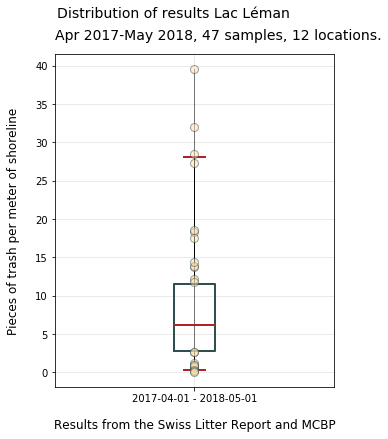

In [22]:
single_boxplot(**kwargs)